In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

input_your_code = None

In [0]:
'''Create a convolution2d method.
You can use a naive algorithm by sliding a kernel on top of the image
Element-wise multiply kernel with the image area under the kernel,
sum all the values and then store it into each location of a new image output.
'''
def convolution2d(image, kernel, bias=0):
  m, n = kernel.shape
  # Check if a kernel has square shape
  if (m == n):
    y, x = image.shape
    '''Dimension for the output
    output_dimension = (input_dimension + 2*padding_size - kernel_size)/stride + 1
    In this case padding is zero, stride is one, there fore we have the output shape
    as we seen below.
    '''
    padding = 0
    stride = 1
    height = (y + 2*padding - m)//stride + 1
    width = (x + 2*padding - n)//stride + 1
    
    feature_map = np.zeros((width, height)).astype('int8')
    
    '''Moving kernel from top left of the image and 
    multiply element-wise between kernel and image area under the kernel,
    then sum all values (This is actually dot product).
    '''
    for i in range(width):
      for j in range(height):
        feature_map[i][j] = np.sum(image[i:i+m, j:j+n] * kernel) + bias
        
    return feature_map
 


def display(image):
  print(image)
  plt.grid(c='grey')
  plt.xticks(np.arange(0, image.shape[0]+1, dtype=np.int))
  plt.yticks(np.arange(0, image.shape[1]+1, dtype=np.int))
  plt.imshow(
      image,
      cmap=plt.cm.gray,
      extent=[0, image.shape[0], 0, image.shape[1]]
  )
  plt.show()

# Vertical Edge Detection



[[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]]


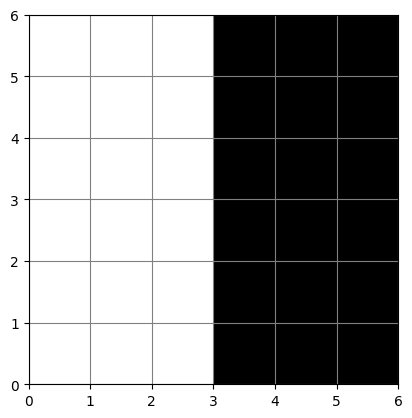

In [17]:
'''Create numpy array as image1 and display it.
[[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]]
 '''

image1 = np.array(
    [[10, 10, 10, 0, 0, 0]] * 6
)
display(image1)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


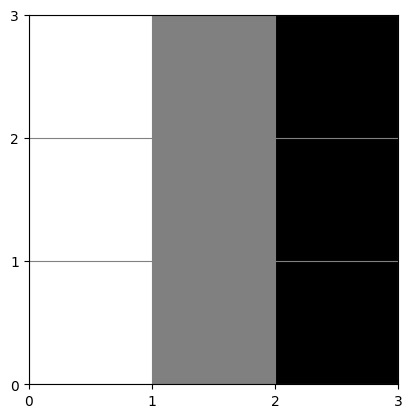

In [18]:
'''Create vertical_edge_kernel and display it:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
'''

vertical_edge_kernel = np.array([[1, 0, -1]]*3)
display(vertical_edge_kernel)

[[ 0 30 30  0]
 [ 0 30 30  0]
 [ 0 30 30  0]
 [ 0 30 30  0]]


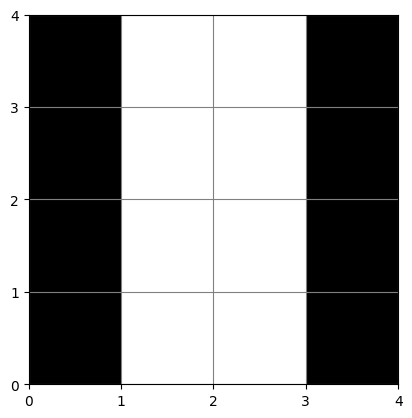

In [19]:
# Call your convolution2d() and display the result.
display(convolution2d(image1, vertical_edge_kernel))

[[ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]


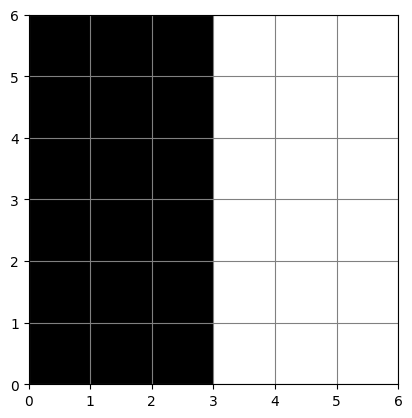

In [20]:
'''Create a numpy array and display it:
[[ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]
'''
image2 = np.array([[0, 0, 0, 10, 10, 10]]*6)

display(image2)

[[  0 -30 -30   0]
 [  0 -30 -30   0]
 [  0 -30 -30   0]
 [  0 -30 -30   0]]


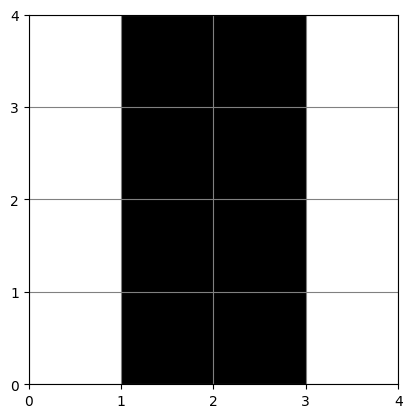

In [21]:
# Call your convolution2d() and display the result.
display(convolution2d(image2, vertical_edge_kernel))

# Horizontal Edge Detection

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


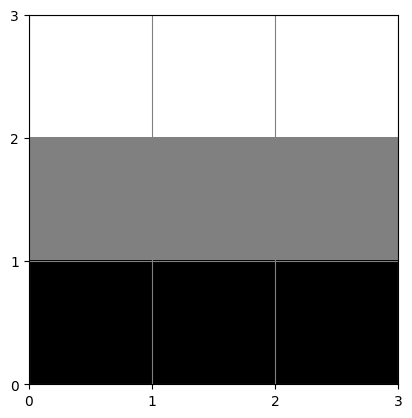

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


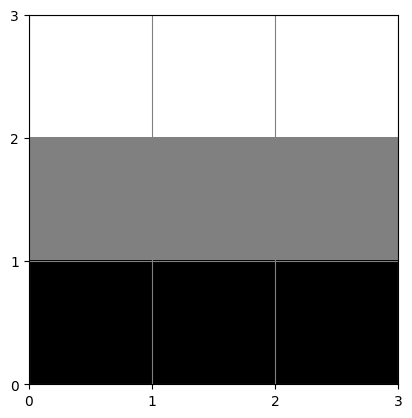

In [45]:
'''Create horizontal_edge_kernel and display it:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]

'''
horizontal_edge_kernel = np.array(
[[1]*3,
[0]*3,
[-1]*3])



horizontal_edge_kernel_1 = np.array([[1, 0, -1]]*3).T

display(horizontal_edge_kernel)
display(horizontal_edge_kernel_1)

[[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]


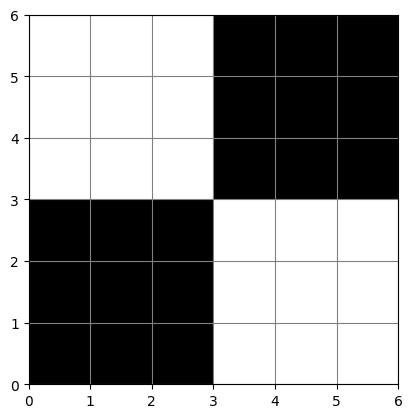

[[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]


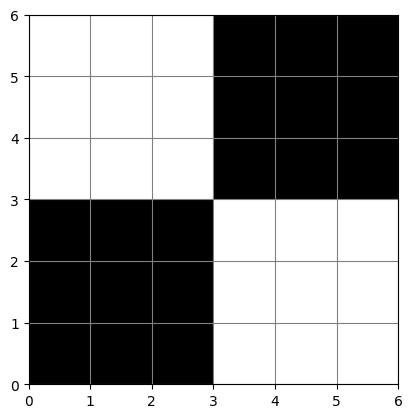

In [46]:
'''Create an numpy array and display it:
[[10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [10 10 10  0  0  0]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]
 [ 0  0  0 10 10 10]]
'''
image3 = np.concatenate((
    np.array(
        [[10, 10, 10, 0, 0, 0]]*3
    ),
    np.array(
        [[0, 0, 0, 10, 10, 10]]*3
    )),
axis=0)
display(image3)




image3_2 = np.array(
[[10,10,10,0,0,0]]*3 + [[0,0,0,10,10,10]]*3)
display(image3_2)


[[  0   0   0   0]
 [ 30  10 -10 -30]
 [ 30  10 -10 -30]
 [  0   0   0   0]]


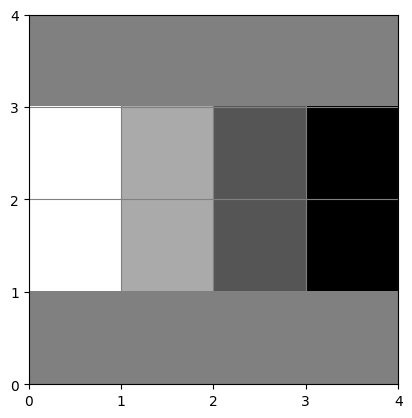

In [47]:
'''Value 0 means there is no edge detected.
Value 30 means 3 bright pixels on top, 3 dark pixels on the bottom.
Value -30 means 3 dark pixels on top, 3 bright pixels on the bottom.
Value 10 is similar to 30 some part of the edge is not bright pixel on top and dark pixel on the bottom.
Value -10 is similar to -30 some part of the edge is not dark pixel on top and bright pixel on the bottom.

'''
# Call your convolution2d(), store it as image4, and display the result.
image4 = convolution2d(image3,horizontal_edge_kernel)
display(image4)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


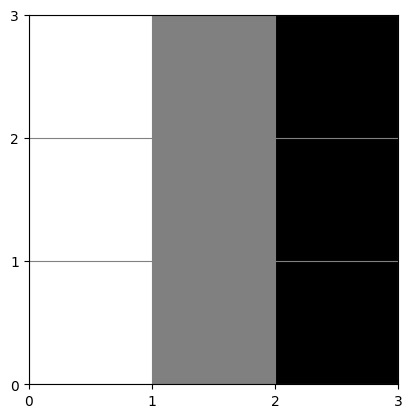

[[80 80]
 [80 80]]


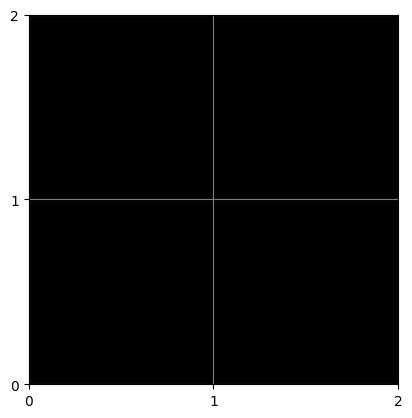

In [48]:
# Apply vertical edge kernel on the previous feature maps to see the result.
display(vertical_edge_kernel)
display(convolution2d(image4, vertical_edge_kernel))